Exercise 2 Chapter 5
-----------

# Example 5.1.3

Before solving the exercise I'll reproduce the figure 5.2. At least the 68% confidence zone.

## Import Libraries

In [1]:
import numpy as np
import pandas as pd

In [2]:
import matplotlib.pyplot as plt

In [3]:
from scipy.stats import binom

## Energy function

In [4]:
e = np.vectorize(lambda A, E, E0 : 1/(1+np.exp(-A*(E-E0))))

## Likelihood

In [4]:
def L(A,E0):
    return ((np.array(Successes)*np.log(e(A,Energy,E0))+(np.array(Trails)-np.array(Successes))*np.log(1-e(A,Energy,E0))).sum(), (A,E0))    

In [5]:
def MLE(A,E0):
    a = np.array([[L(Ai,Ei)[0] for Ai in A] for Ei in E0])
    ia, ie = np.unravel_index(np.argmax(a), a.shape)
    return (A[ia],E0[ie])

## Data set - Figure 5.2
This is Table 5.1

In [4]:
'''
Energy = [0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0]
Trails = [100, 100, 100, 100, 100, 1000, 1000, 1000]
Successes = [0, 4, 20, 58, 92, 987, 995, 998]
df = pd.DataFrame({'Energy':Energy, 'Trails':Trails, 'Successes':Successes})'''

## Grid

In [6]:
E0 = np.linspace(1.6,2,50)
A = np.linspace(3,4,60)

EE0, AA = np.meshgrid(E0,A)

## Ensemble generation

In [7]:
accepted_values = []
for Ei in E0:
    for Ai in A:
        p = e(Ai,Energy,Ei)
        r = [np.random.binomial(t,pi,100) for t, pi in zip(Trails,p)]
        T = np.prod([binom.pmf(ri,t,pi) for ri, t, pi in zip(r, Trails, p)], axis=0)
        T_sorted = np.sort(T)[::-1]
        index_68 = np.around(T.shape[0]*0.68)
        T_data = np.prod([binom.pmf(ri,t,pi) for ri, t, pi in zip(Successes, Trails, p)], axis=0)
        if T_data >= T_sorted[int(index_68-1)]:
            accepted_values.append([Ai,Ei])
accepted_values = np.array(accepted_values)

## MLE

In [13]:
A_MLE, E0_MLE = MLE(A,E0)
print(f'The Maximum Likelihood estimate is A={np.round(A_MLE,2)}, E0={np.round(E0_MLE,2)}')

The Maximum Likelihood estimate is A=3.59, E0=1.89


## Gridding plot

Text(0.5, 1.0, 'A, $E_0$ parameter grid')

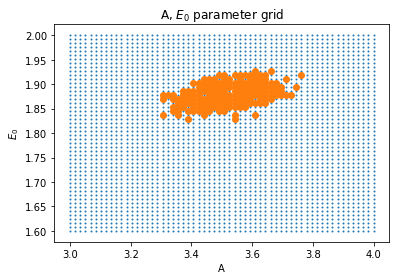

In [12]:
plt.scatter(AA,EE0, s = 1)
plt.scatter(accepted_values[:,0],accepted_values[:,1])
plt.xlabel('A')
plt.ylabel('$E_0$')
plt.title('A, $E_0$ parameter grid')

# Exercise 5.2

In [7]:
Energy = [0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0]
Trails = [100, 100, 100, 100, 100, 100, 100, 100]
Successes = [0, 4, 22, 55, 80, 97, 99, 99]
df = pd.DataFrame({'Energy':Energy, 'Trails':Trails, 'Successes':Successes})

## Grid

In [39]:
A = np.linspace(2.0,4.0,50)
E0 = np.linspace(1.0,3.0,50)

EE0, AA = np.meshgrid(E0,A)

## MLE

In [40]:
A_MLE, E0_MLE = MLE(A,E0)
print(f'The Maximum Likelihood estimate is A={np.round(A_MLE,2)}, E0={np.round(E0_MLE,2)}')

The Maximum Likelihood estimate is A=2.98, E0=2.02


## Ensemble Generation

In [61]:
accepted_values = []
for Ei in E0:
    for Ai in A:
        p = e(Ai,Energy,Ei)
        r = [np.random.binomial(t,pi,500) for t, pi in zip(Trails,p)]
        T = np.prod([binom.pmf(ri,t,pi) for ri, t, pi in zip(r, Trails, p)], axis=0)
        T_sorted = np.sort(T)[::-1]
        index_68 = np.around(T.shape[0]*0.68)
        T_data = np.prod([binom.pmf(ri,t,pi) for ri, t, pi in zip(Successes, Trails, p)], axis=0)
        if T_data >= T_sorted[int(index_68-1)]:
            print([Ai,Ei])
            accepted_values.append([Ai,Ei])
accepted_values = np.array(accepted_values)

[2.7346938775510203, 1.8979591836734693]
[2.7755102040816326, 1.8979591836734693]
[2.816326530612245, 1.8979591836734693]
[2.857142857142857, 1.8979591836734693]
[2.8979591836734695, 1.8979591836734693]
[2.9387755102040813, 1.8979591836734693]
[2.5306122448979593, 1.9387755102040816]
[2.571428571428571, 1.9387755102040816]
[2.6122448979591835, 1.9387755102040816]
[2.6530612244897958, 1.9387755102040816]
[2.693877551020408, 1.9387755102040816]
[2.7346938775510203, 1.9387755102040816]
[2.7755102040816326, 1.9387755102040816]
[2.816326530612245, 1.9387755102040816]
[2.857142857142857, 1.9387755102040816]
[2.8979591836734695, 1.9387755102040816]
[2.9387755102040813, 1.9387755102040816]
[2.979591836734694, 1.9387755102040816]
[3.020408163265306, 1.9387755102040816]
[3.061224489795918, 1.9387755102040816]
[3.1020408163265305, 1.9387755102040816]
[3.142857142857143, 1.9387755102040816]
[3.183673469387755, 1.9387755102040816]
[2.489795918367347, 1.9795918367346939]
[2.5306122448979593, 1.97959

## Plot

Text(0.5, 1.0, 'A, $E_0$ parameter grid')

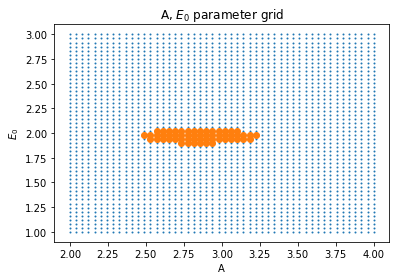

In [62]:
plt.scatter(AA,EE0, s = 1)
plt.scatter(accepted_values[:,0],accepted_values[:,1])
plt.xlabel('A')
plt.ylabel('$E_0$')
plt.title('A, $E_0$ parameter grid')

In [63]:
print(f'The extrem values for the parameters are:\nA:({np.min(accepted_values[:,0])},{np.max(accepted_values[:,0])})\n'
     +f'B:({np.min(accepted_values[:,1])},{np.max(accepted_values[:,1])})')

The extrem values for the parameters are:
A:(2.489795918367347,3.224489795918367)
B:(1.8979591836734693,2.020408163265306)


## p-value

In [64]:
p = e(2.98,Energy,2.02)
r = [np.random.binomial(t,pi,500) for t, pi in zip(Trails,p)]
T = np.prod([binom.pmf(ri,t,pi) for ri, t, pi in zip(r, Trails, p)], axis=0)

In [68]:
T_data = np.prod([binom.pmf(ri,t,pi) for ri, t, pi in zip(Successes, Trails, p)], axis=0)

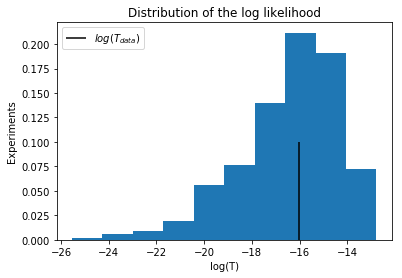

In [94]:
n, bins, patches = plt.hist(np.log(T), density=True)
plt.vlines(x = np.log(T_data), ymin = 0, ymax = 0.1, label = '$log(T_{data})$')
plt.xlabel('log(T)')
plt.ylabel('Experiments', rotation = 'vertical')
plt.title('Distribution of the log likelihood')
plt.legend()


In [113]:
np.sum(n[:8]*(bins[1]-bins[0]))

0.663999999999999

# Exercise 5.3

In [102]:
def L(A,E0):
    if (e(A,Energy,E0)<=0).any() or (A*(Energy-E0)>np.pi/2).any():
        L = -np.inf
        tup = (None,None)
    else:
        L = (np.array(Successes)*np.log(e(A,Energy,E0))+(np.array(Trails)-np.array(Successes))*np.log(1-e(A,Energy,E0))).sum()
        tup = (A,E0)
    return (L,tup) 

In [103]:
def MLE(A,E0):
    a = np.array([[L(Ai,Ei)[0] for Ai in A] for Ei in E0])
    ia, ie = np.unravel_index(np.argmax(a), a.shape)
    return (A[ia],E0[ie])

## Energy function

In [101]:
def e(A, E, E0):
    res = A*(E-E0)
    return max(np.sin(res),0)

e = np.vectorize(e)

## Data

In [89]:
Energy = [0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0]
Trails = [100, 100, 100, 100, 100, 100, 100, 100]
Successes = [0, 4, 22, 55, 80, 97, 99, 99]
df = pd.DataFrame({'Energy':Energy, 'Trails':Trails, 'Successes':Successes})

In [90]:
df

,Energy,Trails,Successes
0,0.5,100,0
1,1.0,100,4
2,1.5,100,22
3,2.0,100,55
4,2.5,100,80
5,3.0,100,97
6,3.5,100,99
7,4.0,100,99


In [91]:
[e(0.3061,ee,0.3061) for t, ee in zip(Trails, Energy)]

[array(0.05931795),
 array(0.2108093),
 array(0.35737222),
 array(0.49558027),
 array(0.62220235),
 array(0.73427819),
 array(0.82918764),
 array(0.90471182)]

In [95]:
[np.random.binomial(t, max(e(0.4949,ee,0.4242),0)) for t, ee in zip(Trails, Energy)]

[4, 29, 54, 70, 86, 95, 100, 98]

## Grid

In [109]:
A = np.linspace(0,1.0,20)
E0 = np.linspace(0,1.0,20)

EE0, AA = np.meshgrid(E0,A)

In [110]:
A_MLE, E0_MLE = MLE(A,E0)
print(f'The Maximum Likelihood estimate is A={np.round(A_MLE,4)}, E0={np.round(E0_MLE,4)}')

The Maximum Likelihood estimate is A=0.4737, E0=0.4211


In [147]:
accepted_values = []
for Ei in E0:
    for Ai in A:
        p = e(Ai,Energy,Ei)
        r = [np.random.binomial(t,max(pi,0),100) for t, pi in zip(Trails,p)]
        T = np.log(np.sum([binom.pmf(ri,t,max(pi,0)) for ri, t, pi in zip(r, Trails, p)], axis=0))
        T_sorted = np.sort(T)[::-1]
        index_68 = np.around(T.shape[0]*0.68)
        T_data = np.log(np.sum([binom.pmf(ri,t,max(pi,0)) for ri, t, pi in zip(Successes, Trails, p)], axis=0))
        if T_data >= T_sorted[int(index_68-1)]:
            print([Ai,Ei])
            accepted_values.append([Ai,Ei])
accepted_values = np.array(accepted_values)

In [148]:
accepted_values

array([], dtype=float64)

IndexError: too many indices for array

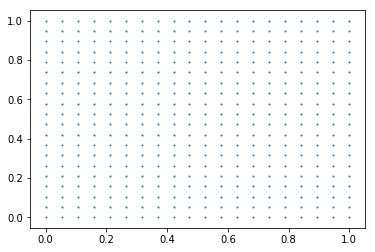

In [149]:
plt.scatter(AA,EE0, s = 1)
plt.scatter(accepted_values[:,0],accepted_values[:,1])
plt.xlabel('A')
plt.ylabel('$E_0$')
plt.title('A, $E_0$ parameter grid')

## P-value

In [202]:
p = e(0.4949,Energy,0.4242)
r = [np.random.binomial(t,pi,100000) for t, pi in zip(Trails,p)]
T = np.prod([binom.pmf(ri,t,pi) for ri, t, pi in zip(r, Trails, p)], axis=0)

In [196]:
T_data = np.prod([binom.pmf(ri,t,pi) for ri, t, pi in zip(Successes, Trails, p)], axis=0)

In [192]:
np.log(T_data)

-61.70836478741928

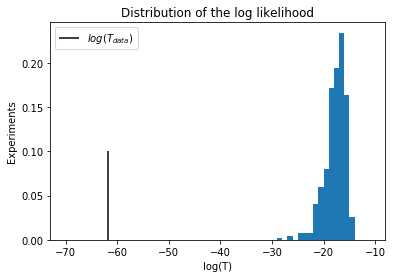

In [174]:
n, bins, patches = plt.hist(np.log(T), density=True, bins = np.arange(-70,-10))
plt.vlines(x = np.log(T_data), ymin = 0, ymax = 0.1, label = '$log(T_{data})$')
plt.xlabel('log(T)')
plt.ylabel('Experiments', rotation = 'vertical')
plt.title('Distribution of the log likelihood')
plt.legend()


In [203]:
hist, bins = np.histogram(np.log(T), bins = 100, range = (-70,-60) )

In [204]:
hist[:84]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [160]:
p = e(0.4949,Energy,0.4242)
T_data = np.log(np.sum([binom.pmf(ri,t,max(pi,0)) for ri, t, pi in zip(Successes, Trails, p)], axis=0))
T_data

-0.49204109766825727

In [162]:
T = np.log(np.sum([binom.pmf(ri,t,max(pi,0)) for ri, t, pi in zip(r, Trails, p)], axis=0))
T_sorted = np.sort(T)[::-1]
index_68 = np.around(T.shape[0]*0.68)
T_sorted[int(index_68-1)]

0.44744598315209755